In [72]:
%matplotlib notebook
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
from dateutil.relativedelta import relativedelta
from mytools import *

In [73]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import backtesting

backtesting.set_bokeh_output(notebook=True)

In [74]:
# 4/10
ticker = 'ALK-B.CO' # wait 1 days
#ticker = 'BOOZT-DKK.CO' # wait 1 days
#ticker = 'DFDS.CO'  # wait 3 days
#ticker = 'MATAS.CO' # wait 1 days
#ticker = 'DEMANT.CO' # wait 2 days

now = dt.datetime.now()
start = now - relativedelta(years=2)

df = pdr.get_data_yahoo(ticker, start, now)
#df.head()

In [75]:
class RSI(Strategy):
    def init(self):

        self.lookback = 14
        self.lower = 35.0
        self.upper = 65.0
        self.x = self.I(rsi, self.data.Close, self.lookback)
        self.nsell = 0
        self.nbuy = 0
    def next(self):       
        if (not self.position.is_long) and crossover(self.x, self.lower):  # going above 40, asset was undervalued, we buy
            self.buy()
        elif (self.position.is_long) and crossover(self.x, self.upper):  # going above 70, asset is overvalued, we sell
            self.sell()

In [76]:
test1 = Backtest(df, RSI, commission=.002, exclusive_orders=True, cash=30000)
stats1 = test1.run()

print(stats1)

test1.plot(open_browser=False, plot_equity=False, plot_volume=False, plot_width=800)

Start                     2020-10-05 00:00:00
End                       2022-10-04 00:00:00
Duration                    729 days 00:00:00
Exposure Time [%]                   96.015936
Equity Final [$]                 33327.717398
Equity Peak [$]                  46660.916571
Return [%]                          11.092391
Buy & Hold Return [%]               14.402175
Return (Ann.) [%]                    5.422464
Volatility (Ann.) [%]               38.485242
Sharpe Ratio                         0.140897
Sortino Ratio                        0.222389
Calmar Ratio                         0.162091
Max. Drawdown [%]                  -33.453264
Avg. Drawdown [%]                     -7.2248
Max. Drawdown Duration      292 days 00:00:00
Avg. Drawdown Duration       38 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      11.110508
Worst Trade [%]                     11.110508
Avg. Trade [%]                    

Row(id='8372', ...)

In [77]:
class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(sma, price, 14)
        self.ma2 = self.I(sma, price, 28)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

In [78]:
test2 = Backtest(df, SmaCross, commission=.002, exclusive_orders=True, cash=30000)
stats2 = test2.run()
print(stats2)

test2.plot(open_browser=False, plot_equity=False, plot_volume=False, plot_width=800)

Start                     2020-10-05 00:00:00
End                       2022-10-04 00:00:00
Duration                    729 days 00:00:00
Exposure Time [%]                   94.023904
Equity Final [$]                 38366.312978
Equity Peak [$]                  40103.329875
Return [%]                           27.88771
Buy & Hold Return [%]               14.402175
Return (Ann.) [%]                   13.142875
Volatility (Ann.) [%]               38.851108
Sharpe Ratio                         0.338288
Sortino Ratio                         0.59215
Calmar Ratio                          0.40648
Max. Drawdown [%]                  -32.333395
Avg. Drawdown [%]                   -8.620012
Max. Drawdown Duration      446 days 00:00:00
Avg. Drawdown Duration       67 days 00:00:00
# Trades                                   16
Win Rate [%]                             50.0
Best Trade [%]                      25.359038
Worst Trade [%]                    -13.391615
Avg. Trade [%]                    

Row(id='8782', ...)

<IPython.core.display.Javascript object>


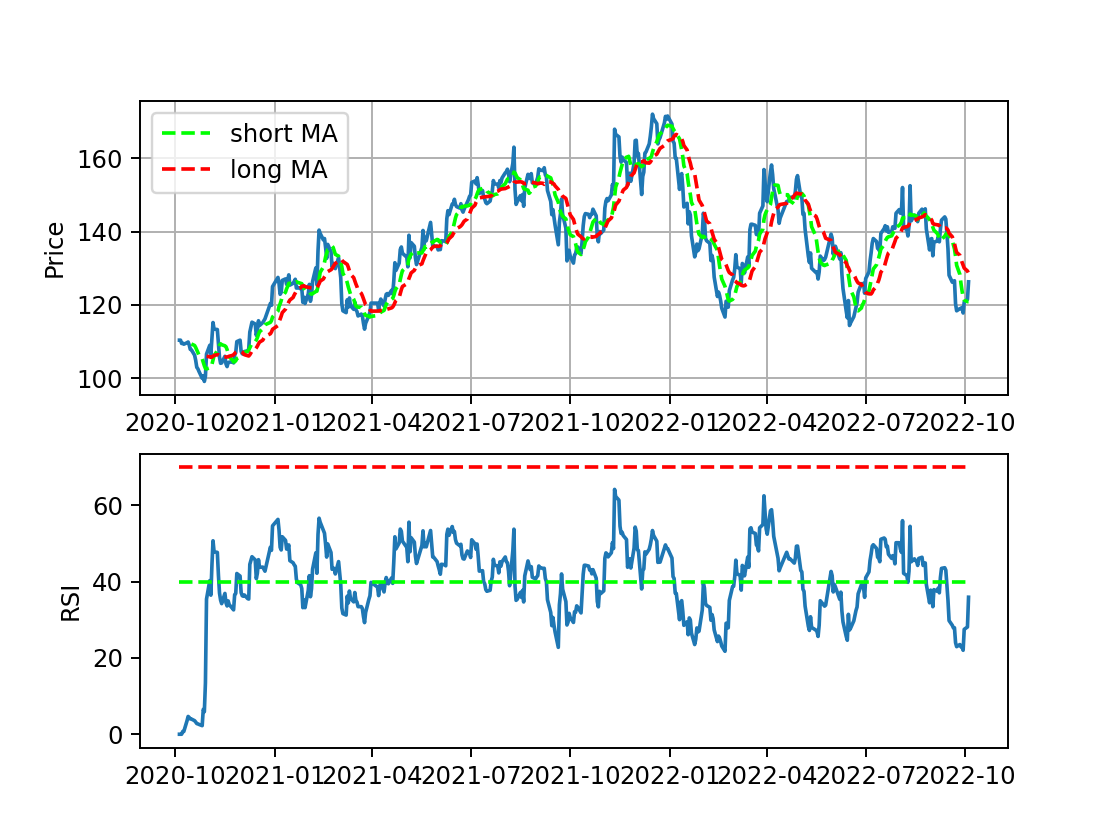

Text(0, 0.5, 'RSI')

In [79]:
fig = plt.figure(1)
fig.clf()

ax11 = fig.add_subplot(211)
ax11.plot(df.Close)
ax11.plot(pd.Series(sma(df.Close.to_numpy(),10), index=df.index), '--', color='lime', label="short MA")
ax11.plot(pd.Series(sma(df.Close.to_numpy(),20), index=df.index), '--', color='red', label="long MA")
ax11.set_ylabel('Price')
ax11.grid(True)

handles, labels = ax11.get_legend_handles_labels()
ax11.legend(handles, labels)

ax12 = fig.add_subplot(212, sharex=ax11)
ax12.plot(df.index, rsi(df.Close.to_numpy()))
ax12.plot(pd.Series(40, index=df.index), '--', color='lime')
ax12.plot(pd.Series(70, index=df.index), '--', color='red')
ax12.set_ylabel('RSI')